In [1]:
import numpy as np
import pandas as pd
import statistics
import math
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', -1)

In [24]:
train_limpio = pd.read_csv("data/train_limpio.csv",encoding = "ISO-8859-1")
train_limpio.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [25]:
df = train_limpio.iloc[1:5]
df.head()

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# Las palabras mas comunes de las noticias y su correspondiente target

In [26]:
from itertools import chain

In [28]:
lens = train_limpio['text'].str.split(' ').map(len)
lens

0       13
1       7 
2       22
3       9 
4       17
        ..
6984    13
6985    20
6986    19
6987    26
6988    20
Name: text, Length: 6989, dtype: int64

In [29]:
res = pd.DataFrame({'id': np.repeat(train_limpio['id'], lens),
                    'keyword': np.repeat(train_limpio['keyword'], lens),
                    'location': np.repeat(train_limpio['location'], lens),
                    'text': np.repeat(train_limpio['text'], lens),
                    'target': np.repeat(train_limpio['target'], lens)
                   }).reset_index()

In [30]:
res.head(60)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
2,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
3,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
4,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
5,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
6,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
7,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
8,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
9,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1


In [76]:
len(res)

104199

In [77]:
#no hacerlo,tara muchísimo, ya guarde el dataframe editado mas abajo
id_actual = 0
posicion_actual = 0
palabras = 0
for i in range (len(res)):
    current_id = res.loc[i,'id']
    if(id_actual !=current_id):
        posicion_actual = 0
        palabras = list((res.loc[i,'text'].split(' ')))
        id_actual = current_id
    else:
        posicion_actual = posicion_actual + 1
    res.loc[i,'text'] = palabras[posicion_actual]

In [78]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,Our,1
1,0,1,NaN,NaN,Deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,Reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,#earthquake,1
8,0,1,NaN,NaN,May,1
9,0,1,NaN,NaN,ALLAH,1


In [88]:
res['text'] = res['text'].map(lambda x: x.lstrip('#').rstrip(',')).map(lambda x: (x.lower()))

In [89]:
res.head(100)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1
6,0,1,NaN,NaN,this,1
7,0,1,NaN,NaN,earthquake,1
8,0,1,NaN,NaN,may,1
9,0,1,NaN,NaN,allah,1


In [3]:
res.to_csv('data/train_una_palabra_por_fila.csv', index=False)

NameError: name 'res' is not defined

In [4]:
palabra_por_fila = pd.read_csv("data/train_una_palabra_por_fila.csv",encoding = "ISO-8859-1")
palabra_por_fila.head(6)

,index,id,keyword,location,text,target
0,0,1,NaN,NaN,our,1
1,0,1,NaN,NaN,deeds,1
2,0,1,NaN,NaN,are,1
3,0,1,NaN,NaN,the,1
4,0,1,NaN,NaN,reason,1
5,0,1,NaN,NaN,of,1


In [5]:
# elimino estos tipos de palabras que no aportan informacion
prepositions = ['of','if', 'with', 'at', 'from', 'into','during','including','until','among','throughout','despite','towards','upon','concerning','to','in','for','on','by','about','like','through','over','before','between','after','since','without','under','within','along','following','across','behind','beyond','plus','except','but','up','out','around','down','off','above','near']
connectors = ['and', 'plus', 'furthermore', 'moreover', 'in addition', 'also', 'as well as','when', 'while', 'as', 'as soon as', 'then', 'after', 'afterwards', 'next', 'firstly', 'secondly', 'finally',  'but', 'however', 'though', 'although', 'nevertheless', 'despite', 'whereas', 'while', 'unless', 'otherwise','because', 'as', 'due to', 'so', 'in order to', 'so', 'therefore', 'as a result', 'consequently']
subjects = ['the','a','and','that','it','this','be','was','are','have','just','so','not','as','will','when','an','has','no','why','first','see','were','their','go','them','last']

In [6]:
#palabra_por_fila.loc[4,'text'].isin(prepositions)

In [7]:
palabra_por_fila = palabra_por_fila[~( (palabra_por_fila['text'].isin(prepositions)) | (palabra_por_fila['text'].isin(connectors)) | (palabra_por_fila['text'].isin(subjects)))]

In [8]:
#primero las agrupo por cada twit,mismo id, así si una palabra 
#aparece varias veces en un mismo twit, solo la cuento una.
palabra_por_mencion = palabra_por_fila.groupby(['id','text']).target.mean().to_frame().reset_index()
palabra_por_mencion.head()

,id,text,target
0,1,all,1
1,1,allah,1
2,1,deeds,1
3,1,earthquake,1
4,1,forgive,1


In [9]:
palabra_por_mencion = palabra_por_mencion.groupby('text').agg({'target':['mean','count']})
palabra_por_mencion.columns=['target mean','target count']
palabra_por_mencion.head()

,target mean,target count
text,,
\n,0.5,32
\n\n,0.0,3
\n\n#mtvsummerstar,0.0,1
\n\n#rt,0.0,1
\n\n+,1.0,1


In [10]:
palabra_por_mencion.shape

(22889, 2)

### examinamos las palabras mas asociadas a noticias verdaderas  y falsas que hayan aparecido varias veces

In [11]:
# noticias verdaderas
palabras_mas_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nlargest(20,'target mean').reset_index()
palabras_mas_veridicas.head(30)

,text,target mean,target count
0,hiroshima,0.984615,65
1,bombing,0.964912,57
2,killed,0.959459,74
3,california,0.942029,69
4,suicide,0.929412,85
5,fires,0.820896,67
6,forest,0.807692,52
7,train,0.805970,67
8,accident,0.787879,66
9,disaster,0.733333,90


<BarContainer object of 20 artists>

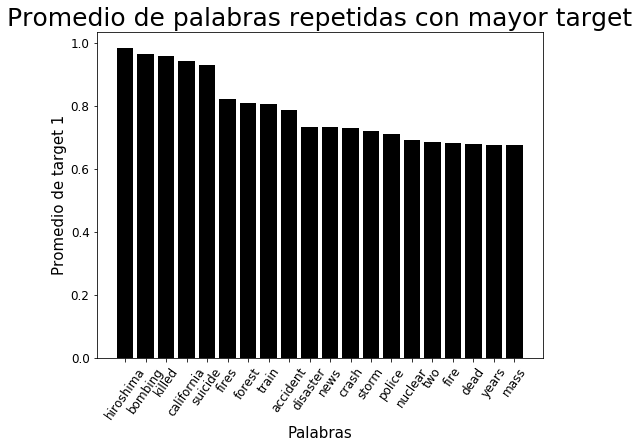

In [12]:
# Variables a graficar
x = palabras_mas_veridicas['text']
y = palabras_mas_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras repetidas con mayor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


### Los twits tienen mayor probabilidad de ser verdaderos cuando tienen esas palabras, tiene sentido porque estas son mas usadas en noticias que en otras conversaciones

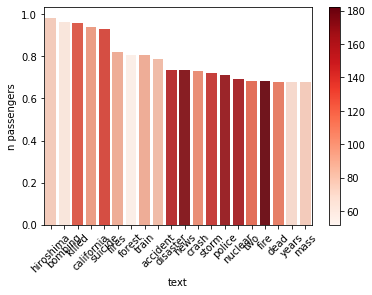

In [153]:
#no voy a usar este gráfico pero lo dejo xq va a servir mas adelante
norm = plt.Normalize(palabras_mas_veridicas['target count'].min(), palabras_mas_veridicas['target count'].max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
ax = sns.barplot(x=palabras_mas_veridicas['text'], y=palabras_mas_veridicas['target mean'], hue=palabras_mas_veridicas['target count'], palette='Reds', 
                 dodge=False)
ax.set_ylabel('n passengers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.show()

In [117]:
# noticias verdaderas
palabras_menos_veridicas = palabra_por_mencion[(palabra_por_mencion['target count']>50)].nsmallest(20,'target mean').reset_index()
palabras_menos_veridicas.head(30)

,text,target mean,target count
0,full,0.074074,54
1,you're,0.090909,55
2,body,0.100917,109
3,love,0.125000,88
4,lol,0.127273,55
5,let,0.129630,54
6,want,0.152778,72
7,??????,0.166667,54
8,you,0.172174,575
9,i'm,0.173077,208


<BarContainer object of 20 artists>

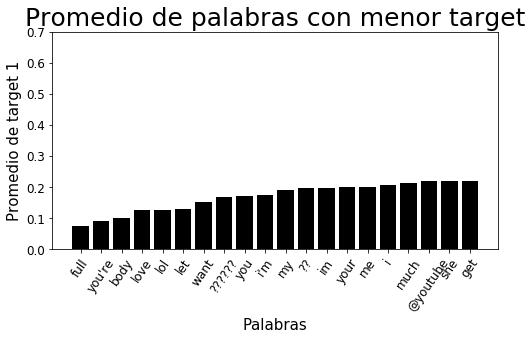

In [161]:
# Variables a graficar
x = palabras_menos_veridicas['text']
y = palabras_menos_veridicas['target mean']

# Tamaño del gráfico
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Palabras", fontsize = 15);
plt.ylabel("Promedio de target 1", fontsize = 15);

# Título
plt.title("Promedio de palabras con menor target", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.tick_params(axis='both', which='minor', labelsize = 12)

# Rotar ejes
plt.xticks(rotation = 55)

# Límites para cada coordenada

# Tipo de gráficok
plt.ylim(0, 0.7)
plt.bar(x, y, color = 'black')

### Dejando de lado palabras como "body","let","want",etc, la precencia de pronombres personales indica mayor probabilidad de que el tweet sea falso ya que los mismos no se usan en noticias, como "you re","you","i'm","my","me","i"

# Y si los twits repetidos tienden a ser mas ciertos, ya que la gente suele compartir la misma noticia?

In [19]:
train = pd.read_csv("data/train.csv",encoding = "ISO-8859-1")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [38]:
train['text'] = train['text'].replace(r'http\S+', '', regex=True)
targets = train.groupby('text').agg({'target':['mean','count']})
targets.columns = ['target','repeticiones del tweet']
targets.head()

,target,repeticiones del tweet
text,,
\nANOTHER DISASTER WAITING TO HAPPEN AND YOUR ALLOWING IT???,1.0,1
\nCROYDON RIOTS- The Next Day: Burning Buildings in High Street &amp; crowds at Reeves Corner\nCroydonization\nAugust 2011,1.0,1
\nSON OF SAVIOR LAVA VIDEO,0.0,1
\nSeems they declared war against government..,1.0,1
Cindy Noonan@CindyNoonan-Heartbreak in #Baltimore #Rioting #YAHIstorical #UndergroundRailraod,0.5,2


In [40]:
targets.nlargest(40,'repeticiones del tweet')

,target,repeticiones del tweet
text,,
Watch This Airport Get Swallowed Up By A Sandstorm In Under A Minute,1.000000,24
Wreckage 'Conclusively Confirmed' as From MH370: Malaysia PM: Investigators and the families of those who were...,1.000000,20
Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea...,1.000000,19
#hot Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] #prebreak #best,0.294118,17
Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ...,1.000000,15
Obama Declares Disaster for Typhoon-Devastated Saipan: Obama signs disaster declaration for Northern Marians a...,1.000000,13
The Latest: More Homes Razed by Northern California Wildfire - ABC News,1.000000,13
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,1.000000,10
70 Years After Atomic Bombs Japan Still Struggles With War Past: The anniversary of the devastation wrought b...,1.000000,9


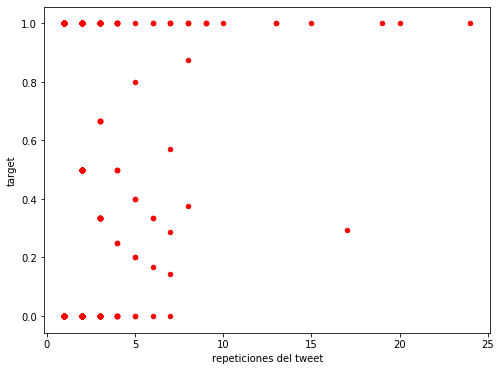

In [56]:
targets.plot.scatter('repeticiones del tweet','target',figsize=(8,6),color = 'red')

In [47]:
aaa = targets.groupby(['target','repeticiones del tweet']).agg({'target':'count'})
aaa.columns = ['cantidad']
aaa = aaa.reset_index()
aaa = aaa[aaa['repeticiones del tweet']>3]
aaa.head()

,target,repeticiones del tweet,cantidad
3,0.000000,4,6
4,0.000000,5,2
5,0.000000,6,1
6,0.000000,7,1
7,0.142857,7,1


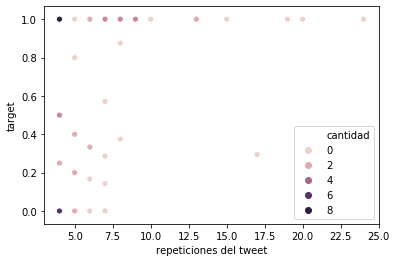

In [55]:
sns.scatterplot(x='repeticiones del tweet', y='target', data=aaa, marker='o', color='red',hue = 'cantidad')

# Se puede ver, entonces, que cuando un twitt se repite varias veces,sucede porque es una noticia y por lo tanto varias personas publican, o comparten, lo mismo
#### (para este mejor usar el gráfico rojo, el otro quedó re mal)

### Hasta ahora, y quizá una podria ser una conclusion, se ve que el target no determina si una noticia es falsa o cierta, sino que determina si un tweet es una noticia o no.

## Los tweets que tienen mas datos (locacion y keyword) tienen mas chances de ser ciertos?

In [20]:
train['tiene location'] = ~(train['location'].isnull())
train['tiene keyword'] = ~(train['keyword'].isnull())

In [21]:
train.groupby(['tiene keyword','tiene location']).agg({'target': ['mean','count']})

target      
                                  mean count
tiene keyword tiene location                
False         False           0.688525  61  
True          False           0.417880  2472
              True            0.432283  5080

In [22]:
train[~train['tiene keyword'] & train['tiene location']]

,id,keyword,location,text,target,tiene location,tiene keyword


## No, no los tienen, sin embargo que nota que hay mucho mayor cantidad de tweets que tienen keyword por sobre aquellos que no
## Ademas,si no tienen keyword, no tienen locacion, mientras que el inverso es falso. (si no tienen keyword no tienen locacion pero si no tienen locacion pueden tener igual keyword)

# La precision de la location influye en la veracidad del tweet?

In [32]:
'''
Algo tipo:
precision 0: si no tiene location
precision 1: si tiene location pero no aporta informacion (la tierra)
precision 2: si su location aporta muy poca informacion(continente)
precision 3: si location es un poco mas precisa (pais)
precision 4: si su location aporta buena informacion(provincia/estado)
precision 5: si su location indica la localidad donde se encuentra( ni idea como hacer esta)
precision X: no entra en ninguna de las otras categorias, posiblemente datos mal cargados
'''

'\nAlgo tipo:\nprecision 0: si no tiene location\nprecision 1: si tiene location pero no aporta informacion (la tierra)\nprecision 2: si su location aporta muy poca informacion(continente)\nprecision 2: si location es un poco mas precisa (pais)\nprecision 3: si su location aporta buena informacion(provincia/estado)\nprecision 4: si su location indica la localidad donde se encuentra( ni idea como hacer esta)\nprecision X: no entra en ninguna de las otras categorias, posiblemente datos mal cargados\n'

In [119]:
precision_1 = ['earth']
precision_2_continentes = ['AFRICA','africa', 'america', 'antarctica', 'asia','oceania','europe']
precision_3_paises = 'Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros Islands, Democratic Republic of the Congo, Djibouti, Egypt, Equatorial Guinea, Eritrea, eSwatini (formerly Swaziland), Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Kenya, Lesotho, Liberia, Libya, Madagascar, Malawi, Mali, Mauritania, Morocco, Mozambique, Namibia, Niger, Nigeria, Republic of the Congo, Rwanda, Sao Tome and Principe, Senegal, Sierra Leone, Somalia, South Africa, South Sudan, Sudan, Tanzania, Togo, Tunisia, Uganda, Western Sahara, Zambia, Zimbabwe Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, French Guiana, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela Antigua and Barbuda, The Bahamas, Barbados, Belize, Canada, Costa Rica, Cuba, Dominica, Dominican Republic, El Salvador, Grenada, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Trinidad and Tobago, USA, UnitedStatesOfAmerica, Albania, Andorra, Austria, Belarus, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Kosovo, Latvia, Liechtenstein, Lithuania, Luxembourg, Macedonia, Malta, Moldova, Monaco, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Russia, San Marino, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, Ukraine, United Kingdom,Vatican City, Afghanistan, Armenia, Azerbaijan, Bahrain, Bangladesh, Bhutan, Brunei, Burma, Cambodia, China, East Timor, Georgia, Hong Kong, India, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Kazakhstan, Kuwait, Kyrgyzstan, Laos, Lebanon, Malaysia, Mongolia, Nepal, North Korea, Oman, Pakistan, Papua New Guinea, Philippines, Qatar, Russia, Saudi Arabia, Singapore, South Korea, Sri Lanka, Syria, Taiwan, Tajikistan, Thailand, Turkey, Turkmenistan, United Arab Emirates, Uzbekistan, Vietnam, Yemen'

In [120]:
precision_3_paises = precision_3_paises.rstrip(' ').lower()

In [121]:
precision_3_paises = list((precision_3_paises.split(', ')))

In [122]:
precision_3_paises

['algeria',
 'angola',
 'benin',
 'botswana',
 'burkina faso',
 'burundi',
 'cameroon',
 'central african republic',
 'chad',
 'comoros islands',
 'democratic republic of the congo',
 'djibouti',
 'egypt',
 'equatorial guinea',
 'eritrea',
 'eswatini (formerly swaziland)',
 'ethiopia',
 'gabon',
 'gambia',
 'ghana',
 'guinea',
 'guinea-bissau',
 'ivory coast',
 'kenya',
 'lesotho',
 'liberia',
 'libya',
 'madagascar',
 'malawi',
 'mali',
 'mauritania',
 'morocco',
 'mozambique',
 'namibia',
 'niger',
 'nigeria',
 'republic of the congo',
 'rwanda',
 'sao tome and principe',
 'senegal',
 'sierra leone',
 'somalia',
 'south africa',
 'south sudan',
 'sudan',
 'tanzania',
 'togo',
 'tunisia',
 'uganda',
 'western sahara',
 'zambia',
 'zimbabwe argentina',
 'bolivia',
 'brazil',
 'chile',
 'colombia',
 'ecuador',
 'french guiana',
 'guyana',
 'paraguay',
 'peru',
 'suriname',
 'uruguay',
 'venezuela antigua and barbuda',
 'the bahamas',
 'barbados',
 'belize',
 'canada',
 'costa rica',
 'c

In [123]:
train.head()

,id,keyword,location,text,target,tiene location,tiene keyword,continente
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,False,False,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False,False,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,False,False,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,False,False,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,False,False,False


In [124]:
train[(train['tiene location'])].head()

,id,keyword,location,text,target,tiene location,tiene keyword,continente
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,True,True,False
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,True,True,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,True,True,False
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,True,True,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,True,True,False


In [242]:
train['continente'] = train['location'].str.lower().contains(precision_2_continentes)

AttributeError: 'Series' object has no attribute 'contains'

In [133]:
train['pais'] = train['location'].isin(precision_3_paises)

In [136]:
train[(train['continente'])].shape

(14, 9)

In [137]:
train[(train['pais'])].shape

(24, 9)

### Este lo dejo acá, es un lío y no voy a conseguir nada útil

# La cantidad de caracteres raros influye en la certeza de n tweet?

In [150]:
train.loc[100:200].head(200)

,id,keyword,location,text,target,tiene location,tiene keyword,continente,pais
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad,1,True,True,False,False
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya coming forward to comment on the accident issue and disciplinary measures#ArrestPastorNganga,0,True,True,False,False
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0,True,True,False,False
103,149,aftershock,304,'The man who can drive himself further once the effort gets painful is the man who will win.' \nRoger Bannister,0,True,True,False,False
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yNXnvVKCDA | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_ http://t.co/weQPesENku,0,True,True,False,False
105,153,aftershock,304,'There is no victory at bargain basement prices.' Dwight David Eisenhower,0,True,True,False,False
106,156,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÂÃ_ http://t.co/zEVakJaPcz,0,True,True,False,False
107,157,aftershock,304,'Nobody remembers who came in second.' Charles Schulz,0,True,True,False,False
108,158,aftershock,Instagram - @heyimginog,@afterShock_DeLo im speaking from someone that is using a scuf on xb1 most of them people will end up getting on for ps also.,0,True,True,False,False
109,159,aftershock,304,'The harder the conflict the more glorious the triumph.' Thomas Paine,0,True,True,False,False


In [144]:
# Hasta ahora encontré # ?? ¿¿ = > < -   !! ; ) [ ] ( @ _ + * Â  Ã  ÂÃ£Â¢ & ;% $ | °

In [226]:
train['cantiad de #'] = train['text'].str.count('#')

In [227]:
train['cantiad de !'] = train['text'].str.count('!')

In [228]:
train['cantiad de ['] = train['text'].str.count('\[')

In [229]:
train['cantiad de +'] = train['text'].str.count('\+')

In [230]:
train['cantiad de *'] = train['text'].str.count('\*')

In [231]:
train['cantiad de ¢'] = train['text'].str.count('\¢')

In [232]:
train['cantiad de $'] = train['text'].str.count('\$')

In [233]:
train['cantiad de %'] = train['text'].str.count('\%')

In [234]:
train['cantiad de Â'] = train['text'].str.count('\Â')

In [235]:
train['cantiad de |'] = train['text'].str.count('\|')

In [236]:
train['cantiad de °'] = train['text'].str.count('\°')

In [238]:
train.groupby('cantiad de #').agg({'target':['mean','count']})

target      
                  mean count
cantiad de #                
0             0.409433  5852
1             0.500000  964 
2             0.501235  405 
3             0.480769  208 
4             0.457831  83  
5             0.560976  41  
6             0.269231  26  
7             0.500000  8   
8             0.875000  8   
9             0.000000  2   
10            0.700000  10  
11            0.000000  2   
13            1.000000  4

In [239]:
train.groupby('cantiad de !').agg({'target':['mean','count']})

target      
                  mean count
cantiad de !                
0             0.446040  6894
1             0.274059  478 
2             0.272727  143 
3             0.211538  52  
4             0.200000  20  
5             0.500000  10  
6             0.285714  7   
7             0.333333  3   
8             1.000000  2   
10            0.000000  1   
11            0.000000  2   
12            1.000000  1

In [240]:
train.groupby('cantiad de $').agg({'target':['mean','count']})

target      
                  mean count
cantiad de $                
0             0.430231  7575
1             0.342857  35  
2             0.000000  1   
3             0.000000  1   
4             0.000000  1

In [241]:
# MUCHAS MAYUSCULAS(hacer promedio onda cantidad de mayusculas/longitud de tweet)? 
#muchos caracteres repetidos? Muchos numeros?

## Si hay mayor cantidad,en promedio, de mayusculas en un tweet,es menos fiable?

In [24]:
train_limpio = pd.read_csv("data/train_limpio.csv",encoding = "ISO-8859-1")

## Promedio de mayúsculas

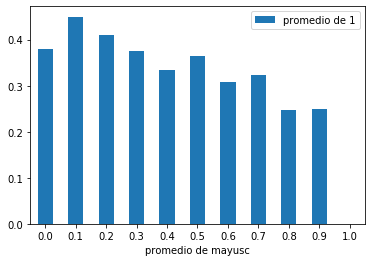

In [36]:
train_limpio['promedio de mayusculas'] = train_limpio['text'].str.count(r'[A-Z]')/train_limpio['text'].str.len() 
train_limpio['promedio de mayusculas'] = train_limpio['promedio de mayusculas'].round(decimals=1)
promedio_mayusc = train_limpio.groupby('promedio de mayusculas').agg({'target':['mean','count']}).reset_index()
promedio_mayusc.columns = ['promedio de mayusc','promedio de 1','cantidad']
ax = promedio_mayusc.plot.bar(x='promedio de mayusc', y='promedio de 1', rot=0)

## Mayúsculas por letra

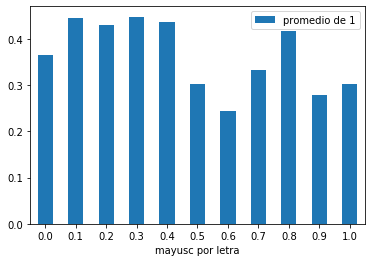

In [37]:
train_limpio['mayusculas por letra'] = train_limpio['text'].str.count(r'[A-Z]')/(train_limpio['text'].str.count(r'[A-Z]')+train_limpio['text'].str.count(r'[a-z]'))
train_limpio['mayusculas por letra'] = train_limpio['mayusculas por letra'].round(decimals=1)
mayusc_por_letra = train_limpio.groupby('mayusculas por letra').agg({'target':['mean','count']}).reset_index()
mayusc_por_letra.columns = ['mayusc por letra','promedio de 1','cantidad']
ax = mayusc_por_letra.plot.bar(x='mayusc por letra', y='promedio de 1', rot=0)

## Mayusculas por palabra

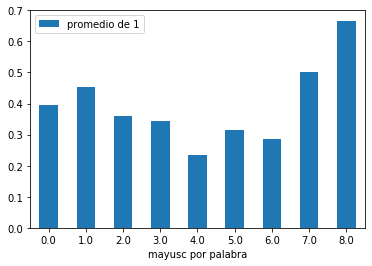

In [39]:
train_limpio['mayusculas por palabra'] = train_limpio['text'].str.count(r'[A-Z]')/train_limpio['text'].str.split(' ').map(len)
train_limpio['mayusculas por palabra'] = train_limpio['mayusculas por palabra'].round(decimals=0)
mayusc_por_palabra = train_limpio.groupby('mayusculas por palabra').agg({'target':['mean','count']}).reset_index()
mayusc_por_palabra.columns = ['mayusc por palabra','promedio de 1','cantidad']
ax = mayusc_por_palabra.plot.bar(x='mayusc por palabra', y='promedio de 1', rot=0)

## Cantidad de mayúsculas

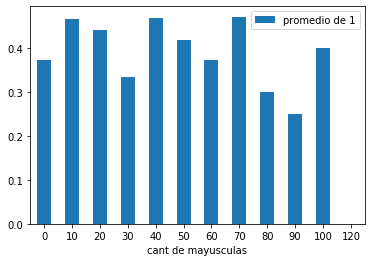

In [40]:
train_limpio['cantidad de mayusculas'] = train_limpio['text'].str.count(r'[A-Z]')
train_limpio['cantidad de mayusculas'] = train_limpio['cantidad de mayusculas'].round(decimals=-1)
cant_mayusc = train_limpio.groupby('cantidad de mayusculas').agg({'target':['mean','count']}).reset_index()
cant_mayusc.columns = ['cant de mayusculas','promedio de 1','cantidad']
ax = cant_mayusc.plot.bar(x='cant de mayusculas', y='promedio de 1', rot=0)

## El único caso en el que se pudo ver una, minima,relacion, es en el promedio de mayusculas por longitud de tweet

## Acá no se ve ninguna relacion, en el otro si

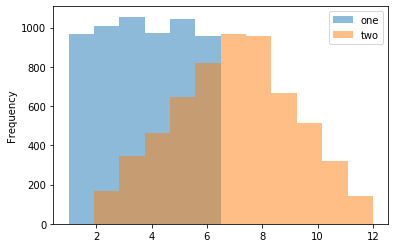

In [255]:
df = pd.DataFrame(

    np.random.randint(1, 7, 6000),

    columns = ['one'])

df['two'] = df['one'] + np.random.randint(1, 7, 6000)

ax = df.plot.hist(bins=12, alpha=0.5)

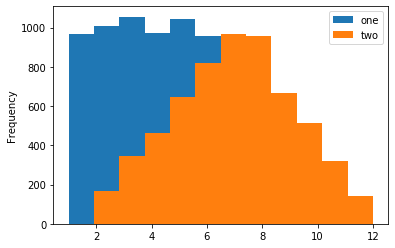

In [258]:
ax = df.plot.hist(bins=12, alpha=1)

## Que tanto influen los signos de pregunta?

In [17]:
train_limpio['signos de pregunta'] = train_limpio['text'].str.count('\?')

In [20]:
train_limpio.groupby('signos de pregunta').agg({'target':['count','mean']})

target          
                    count      mean
signos de pregunta                 
0                   5977   0.428810
1                   419    0.360382
2                   281    0.185053
3                   32     0.281250
4                   123    0.260163
5                   5      0.200000
6                   67     0.149254
7                   10     0.300000
8                   28     0.214286
9                   2      1.000000
10                  11     0.272727
11                  3      0.666667
12                  14     0.357143
14                  3      0.000000
15                  1      0.000000
16                  1      0.000000
18                  2      0.500000
20                  1      1.000000
22                  2      0.000000
24                  1      0.000000
26                  1      0.000000
28                  1      0.000000
34                  1      0.000000
50                  2      0.000000
54                  1      0.000000